In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\Cus_trail.csv", encoding='latin1')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.isnull().sum()

pvsnr                        0
vsnr                         0
status                       0
aktiv                        0
akt_kuka                     0
spartek                      0
beginn                       0
datum_s                 165803
vtr_dau                      0
kund_beg                     0
vtrweg                       0
gesbeitr                     0
SDANZAHL                     0
SCHAGESA                     0
KOSTGESA                     0
KOSTGEKA                     0
kosten_verw                  0
kosten_prov                  0
gfeld                        0
ort                          0
plz                          0
alter                        0
anr                          0
SDBEITR5                     0
HERSTELLER                   2
HSN                       1993
TSN                       3769
ELEKTRO                      0
KILOMETERSTAND_CLEAN     36522
ZW                           0
WKZ                     277469
KH_SF                   277612
ERSZ_akt

In [6]:
df = df[df['id_beruf'].notnull()]


In [7]:
columns_to_drop = [
    'WKZ', 'KH_SF', 'ERSZ_aktiv','datum_s',
    'ZW_storn', 'WKZ_storn', 'KH_SF_storn', 'ERSZ_storn','pvsnr'
]

df = df.drop(columns=columns_to_drop)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181969 entries, 107563 to 444220
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vsnr                  181969 non-null  object 
 1   status                181969 non-null  object 
 2   aktiv                 181969 non-null  int64  
 3   akt_kuka              181969 non-null  int64  
 4   spartek               181969 non-null  object 
 5   beginn                181969 non-null  object 
 6   vtr_dau               181969 non-null  float64
 7   kund_beg              181969 non-null  object 
 8   vtrweg                181969 non-null  object 
 9   gesbeitr              181969 non-null  float64
 10  SDANZAHL              181969 non-null  int64  
 11  SCHAGESA              181969 non-null  float64
 12  KOSTGESA              181969 non-null  float64
 13  KOSTGEKA              181969 non-null  float64
 14  kosten_verw           181969 non-null  float64
 15  

In [9]:
#Factorizing the data from catagorical to numerical
df['beginn'] = pd.to_datetime(df['beginn'], format='%d.%m.%Y')
df['beg_year'] = df['beginn'].dt.year
df['beg_month'] = df['beginn'].dt.month
df['beg_day'] = df['beginn'].dt.day
# Extracting Weekday from date
df['weekday'] = df['beginn'].dt.day_name()
df['Quarter'] = pd.to_datetime(df['beg_month'], format='%m').dt.quarter

In [10]:
#Factorizing the data from catagorical to numerical
df['Weekday_id'] = pd.factorize(df['weekday'])[0]+1
df.replace({'V':1, 'M':2, 'S':3, 'D':4},inplace=True)

In [11]:
#Factorizing the data from catagorical to numerical
df['Cus_type'] = df['gfeld'].str.split('/').str[0]
df['Cus_typ_id'] = pd.factorize(df['Cus_type'])[0]+1
df['ort_id'] = pd.factorize(df['ort'])[0]+1
df[['Sex_id','Sex']]= df['anr'].str.split('/',expand=True)
df['gender_id'] = pd.factorize(df['Sex_id'])[0]+1
df['plz_id'] = pd.factorize(df['plz'])[0]+1
df['Hersteller_id'] = pd.factorize(df['HERSTELLER'])[0]+1
df['spartek'] = pd.factorize(df['spartek'])[0]+1

In [12]:
labels, uniques = pd.factorize(df['plz'])
df['plz_id'] = labels + 1  # If you want to start from 1

# Display the mapping
mapping = {category: code + 1 for code, category in enumerate(uniques)}
print(mapping)


{'55126': 1, '51427': 2, '41462': 3, '55234': 4, '23611': 5, '15907': 6, '66538': 7, '67354': 8, '59590': 9, '47918': 10, '90602': 11, '17039': 12, '25451': 13, '71566': 14, '64646': 15, '38442': 16, '12619': 17, '36419': 18, '50829': 19, '34599': 20, '38304': 21, '22850': 22, '85057': 23, '71088': 24, '37115': 25, '64732': 26, '80333': 27, '31582': 28, '01139': 29, '89073': 30, '15370': 31, '04177': 32, '77963': 33, '60388': 34, '32257': 35, '59505': 36, '91058': 37, '86153': 38, '72072': 39, '32657': 40, '86899': 41, '48496': 42, '84069': 43, '87527': 44, '67227': 45, '91338': 46, '67655': 47, '22179': 48, '21423': 49, '31191': 50, '64289': 51, '50735': 52, '51467': 53, '86159': 54, '33334': 55, '38518': 56, '64367': 57, '38542': 58, '04916': 59, '81545': 60, '57612': 61, '77654': 62, '50678': 63, '13509': 64, '74889': 65, '67122': 66, '44869': 67, '64291': 68, '68723': 69, '19258': 70, '64859': 71, '65439': 72, '97762': 73, '63571': 74, '85598': 75, '47228': 76, '36041': 77, '04229'

In [13]:
# Mapping postal codes to states in Germany
# The mapping is based on the first two digits of the postal code (PLZ)
plz_state_mapping = {
    '01': 'Sachsen',
    '02': 'Sachsen',
    '03': 'Brandenburg',
    '04': 'Sachsen',
    '05': 'Sachsen-Anhalt',
    '06': 'Sachsen-Anhalt',
    '07': 'Thüringen',
    '08': 'Sachsen',
    '09': 'Sachsen',

    '10': 'Berlin', '11': 'Berlin', '12': 'Brandenburg',
    '13': 'Brandenburg', '14': 'Brandenburg', '15': 'Brandenburg',
    '16': 'Brandenburg',

    '17': 'Mecklenburg-Vorpommern', '18': 'Mecklenburg-Vorpommern',
    '19': 'Mecklenburg-Vorpommern',

    '20': 'Schleswig-Holstein', '21': 'Schleswig-Holstein',
    '22': 'Hamburg', '23': 'Schleswig-Holstein',

    '24': 'Schleswig-Holstein', '25': 'Schleswig-Holstein',
    '26': 'Niedersachsen', '27': 'Bremen', '28': 'Bremen',
    '29': 'Niedersachsen',

    '30': 'Niedersachsen', '31': 'Niedersachsen', '32': 'Nordrhein-Westfalen',
    '33': 'Nordrhein-Westfalen', '34': 'Hessen',

    '35': 'Hessen', '36': 'Hessen', '37': 'Niedersachsen',
    '38': 'Niedersachsen', '39': 'Sachsen-Anhalt',

    '40': 'Nordrhein-Westfalen', '41': 'Nordrhein-Westfalen',
    '42': 'Nordrhein-Westfalen', '44': 'Nordrhein-Westfalen',
    '45': 'Nordrhein-Westfalen', '46': 'Nordrhein-Westfalen',

    '47': 'Nordrhein-Westfalen', '48': 'Nordrhein-Westfalen',
    '49': 'Niedersachsen',

    '50': 'Nordrhein-Westfalen', '51': 'Nordrhein-Westfalen',
    '52': 'Nordrhein-Westfalen', '53': 'Nordrhein-Westfalen',
    '54': 'Rheinland-Pfalz', '55': 'Rheinland-Pfalz',

    '56': 'Rheinland-Pfalz', '57': 'Nordrhein-Westfalen',
    '58': 'Nordrhein-Westfalen', '59': 'Nordrhein-Westfalen',

    '60': 'Hessen', '61': 'Hessen', '62': 'Hessen',
    '63': 'Hessen', '64': 'Hessen', '65': 'Hessen',

    '66': 'Saarland', '67': 'Rheinland-Pfalz', '68': 'Rheinland-Pfalz',
    '69': 'Hessen',

    '70': 'Baden-Württemberg', '71': 'Baden-Württemberg',
    '72': 'Baden-Württemberg', '73': 'Baden-Württemberg',
    '74': 'Baden-Württemberg', '75': 'Baden-Württemberg',
    '76': 'Baden-Württemberg', '77': 'Baden-Württemberg',
    '78': 'Baden-Württemberg', '79': 'Baden-Württemberg',

    '80': 'Bayern', '81': 'Bayern', '82': 'Bayern', '83': 'Bayern',
    '84': 'Bayern', '85': 'Bayern', '86': 'Bayern', '87': 'Bayern',
    '88': 'Bayern', '89': 'Bayern',

    '90': 'Bayern', '91': 'Bayern', '92': 'Bayern', '93': 'Bayern',
    '94': 'Bayern', '95': 'Bayern', '96': 'Bayern',

    '97': 'Bayern', '98': 'Thüringen', '99': 'Thüringen'
}

def get_state_from_plz(plz):
    if pd.isnull(plz):
        return None
    try:
        plz_str = str(plz).zfill(5)  # ensure it's 5 digits
        return plz_state_mapping.get(plz_str[:2])
    except:
        return None
    
df['state'] = df['plz'].apply(get_state_from_plz)
df['state_id'] = pd.factorize(df['state'])[0]+1
df = df.dropna(subset=['state'])


In [14]:
#Factorizing the data from catagorical to numerical
df['status_id'] = pd.factorize(df['status'])[0]+1
df['ELEKTRO'] = pd.factorize(df['ELEKTRO'])[0]+1

In [15]:
#Using this technique as factorize make nan values to 0, nan values should be in nan 
codes, uniques = pd.factorize(df['TSN'], sort=True)
df['TSN'] = np.where(df['TSN'].isna(), np.nan, codes + 1)
df['alter'] = df['alter'].replace([998, 999], np.nan)


In [16]:
#Converting the date column to datetime format
df['First_reg'] = pd.to_datetime(df['ersz_final'], format="%d%b%Y")
df['Car_age_indays'] = (pd.Timestamp.today() - df['First_reg']).dt.days
df['carage_years'] = df['Car_age_indays'] / 365.25
df['carage_years'] = df['carage_years'].round(0)
df = df[df['carage_years'] >= 0]


In [17]:
df.head()

,vsnr,status,aktiv,akt_kuka,spartek,beginn,vtr_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND_CLEAN,ZW,id_beruf,fahrertyp,claim,ersz_final,beg_year,beg_month,beg_day,weekday,Quarter,Weekday_id,Cus_type,Cus_typ_id,ort_id,Sex_id,Sex,gender_id,plz_id,Hersteller_id,state,state_id,status_id,First_reg,Car_age_indays,carage_years
107563,96043405-001,Storno,0,0,1,2012-01-01,4018.0,01.01.2011,4,258.61,0,0.0,0.0,0.0,92.66,58.29,70270/ Privatkunden,Mainz,55126,82.0,71295/ Herr,726.36,MERCEDES-BENZ S. AUCH DAI,710.0,190.0,1,132336.0,*No Format*,32.0,06743/ Hauptfahrer,0,14JUN1999,2012,1,1,Sunday,1,1,70270,1,1,71295,Herr,1,1,1,Rheinland-Pfalz,1,1,1999-06-14,9549,26.0
107564,96043405-001,Storno,0,0,2,2012-01-01,4018.0,01.01.2011,4,36.20,0,0.0,0.0,0.0,12.75,7.96,70270/ Privatkunden,Mainz,55126,82.0,71295/ Herr,99.91,MERCEDES-BENZ S. AUCH DAI,710.0,190.0,1,132336.0,*No Format*,32.0,06743/ Hauptfahrer,0,14JUN1999,2012,1,1,Sunday,1,1,70270,1,1,71295,Herr,1,1,1,Rheinland-Pfalz,1,1,1999-06-14,9549,26.0
107565,96043405-001,Storno,0,0,1,2012-01-01,4018.0,01.01.2011,4,258.61,0,0.0,0.0,0.0,92.66,58.29,70270/ Privatkunden,Mainz,55126,82.0,71295/ Herr,726.36,MERCEDES-BENZ S. AUCH DAI,710.0,190.0,1,132336.0,*No Format*,32.0,06743/ Hauptfahrer,0,14JUN1999,2012,1,1,Sunday,1,1,70270,1,1,71295,Herr,1,1,1,Rheinland-Pfalz,1,1,1999-06-14,9549,26.0
107566,96043405-001,Storno,0,0,2,2012-01-01,4018.0,01.01.2011,4,36.20,0,0.0,0.0,0.0,12.75,7.96,70270/ Privatkunden,Mainz,55126,82.0,71295/ Herr,99.91,MERCEDES-BENZ S. AUCH DAI,710.0,190.0,1,132336.0,*No Format*,32.0,06743/ Hauptfahrer,0,14JUN1999,2012,1,1,Sunday,1,1,70270,1,1,71295,Herr,1,1,1,Rheinland-Pfalz,1,1,1999-06-14,9549,26.0
107567,96043405-001,Storno,0,0,1,2012-01-01,4018.0,01.01.2011,4,258.61,0,0.0,0.0,0.0,92.66,58.29,70270/ Privatkunden,Mainz,55126,82.0,71295/ Herr,726.36,MERCEDES-BENZ S. AUCH DAI,710.0,190.0,1,132336.0,*No Format*,32.0,06743/ Hauptfahrer,0,14JUN1999,2012,1,1,Sunday,1,1,70270,1,1,71295,Herr,1,1,1,Rheinland-Pfalz,1,1,1999-06-14,9549,26.0


In [18]:
#vtr_dau gesbeitr KOSTGESA KOSTGEKA kosten_verw kosten_prov  spartek status_id Car_age_indays estimated_total_paid

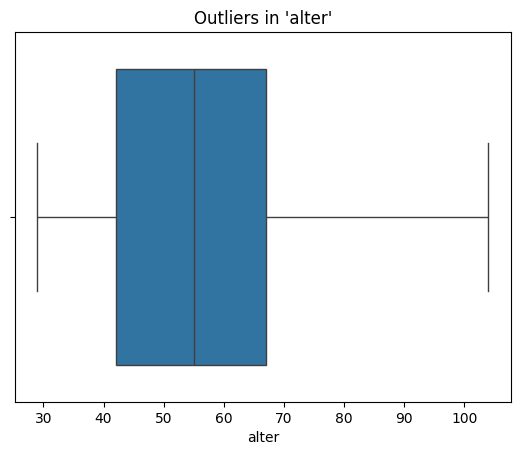

In [19]:
# Creating a boxplot to visualize outliers in the 'alter' column
sns.boxplot(x=df['alter'])
plt.title("Outliers in 'alter'")
plt.show()


In [20]:
df.alter.unique()

array([ 82.,  66.,  65.,  68.,  45.,  42.,  88.,  56.,  70.,  40.,  93.,
        60.,  53.,  63.,  58.,  39.,  51.,  48.,  44.,  57.,  80.,  35.,
        43.,  69.,  36.,  38.,  47.,  92.,  55.,  64.,  78.,  59.,  50.,
        61.,  46.,  67.,  52.,  83.,  81.,  86.,  41.,  62.,  71.,  87.,
        37.,  84.,  73.,  90.,  74.,  nan,  75.,  76.,  72.,  85.,  91.,
        89.,  34.,  49.,  95.,  77.,  79.,  33.,  32.,  94., 101.,  54.,
        96.,  31.,  30.,  98.,  99.,  97., 100., 104.,  29.])

In [21]:
#Handeling missing alter values 
#First, we will check how many missing values are in the 'alter' column and then fill them with random ages between 18 and 85.
missing_count = df['alter'].isnull().sum()
min_age = 18
max_age = 85
random_ages = np.random.randint(min_age, max_age + 1, size=missing_count)
df.loc[df['alter'].isnull(), 'alter'] = random_ages

In [22]:
df = df.dropna(subset=['TSN']).copy()
df['TSN_id']= pd.factorize(df['TSN'])[0]+1  
# To estimate the actual amount customer paid during his entire duration of service 
df['estimated_total_paid'] = (df['SDBEITR5'] / (5 * 365)) * df['vtr_dau']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181969 entries, 107563 to 444220
Data columns (total 54 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   vsnr                  181969 non-null  object        
 1   status                181969 non-null  object        
 2   aktiv                 181969 non-null  int64         
 3   akt_kuka              181969 non-null  int64         
 4   spartek               181969 non-null  int64         
 5   beginn                181969 non-null  datetime64[ns]
 6   vtr_dau               181969 non-null  float64       
 7   kund_beg              181969 non-null  object        
 8   vtrweg                181969 non-null  int64         
 9   gesbeitr              181969 non-null  float64       
 10  SDANZAHL              181969 non-null  int64         
 11  SCHAGESA              181969 non-null  float64       
 12  KOSTGESA              181969 non-null  float64       
 13 

In [24]:

df['fahrertyp'] = pd.factorize(df['fahrertyp'])[0]+1


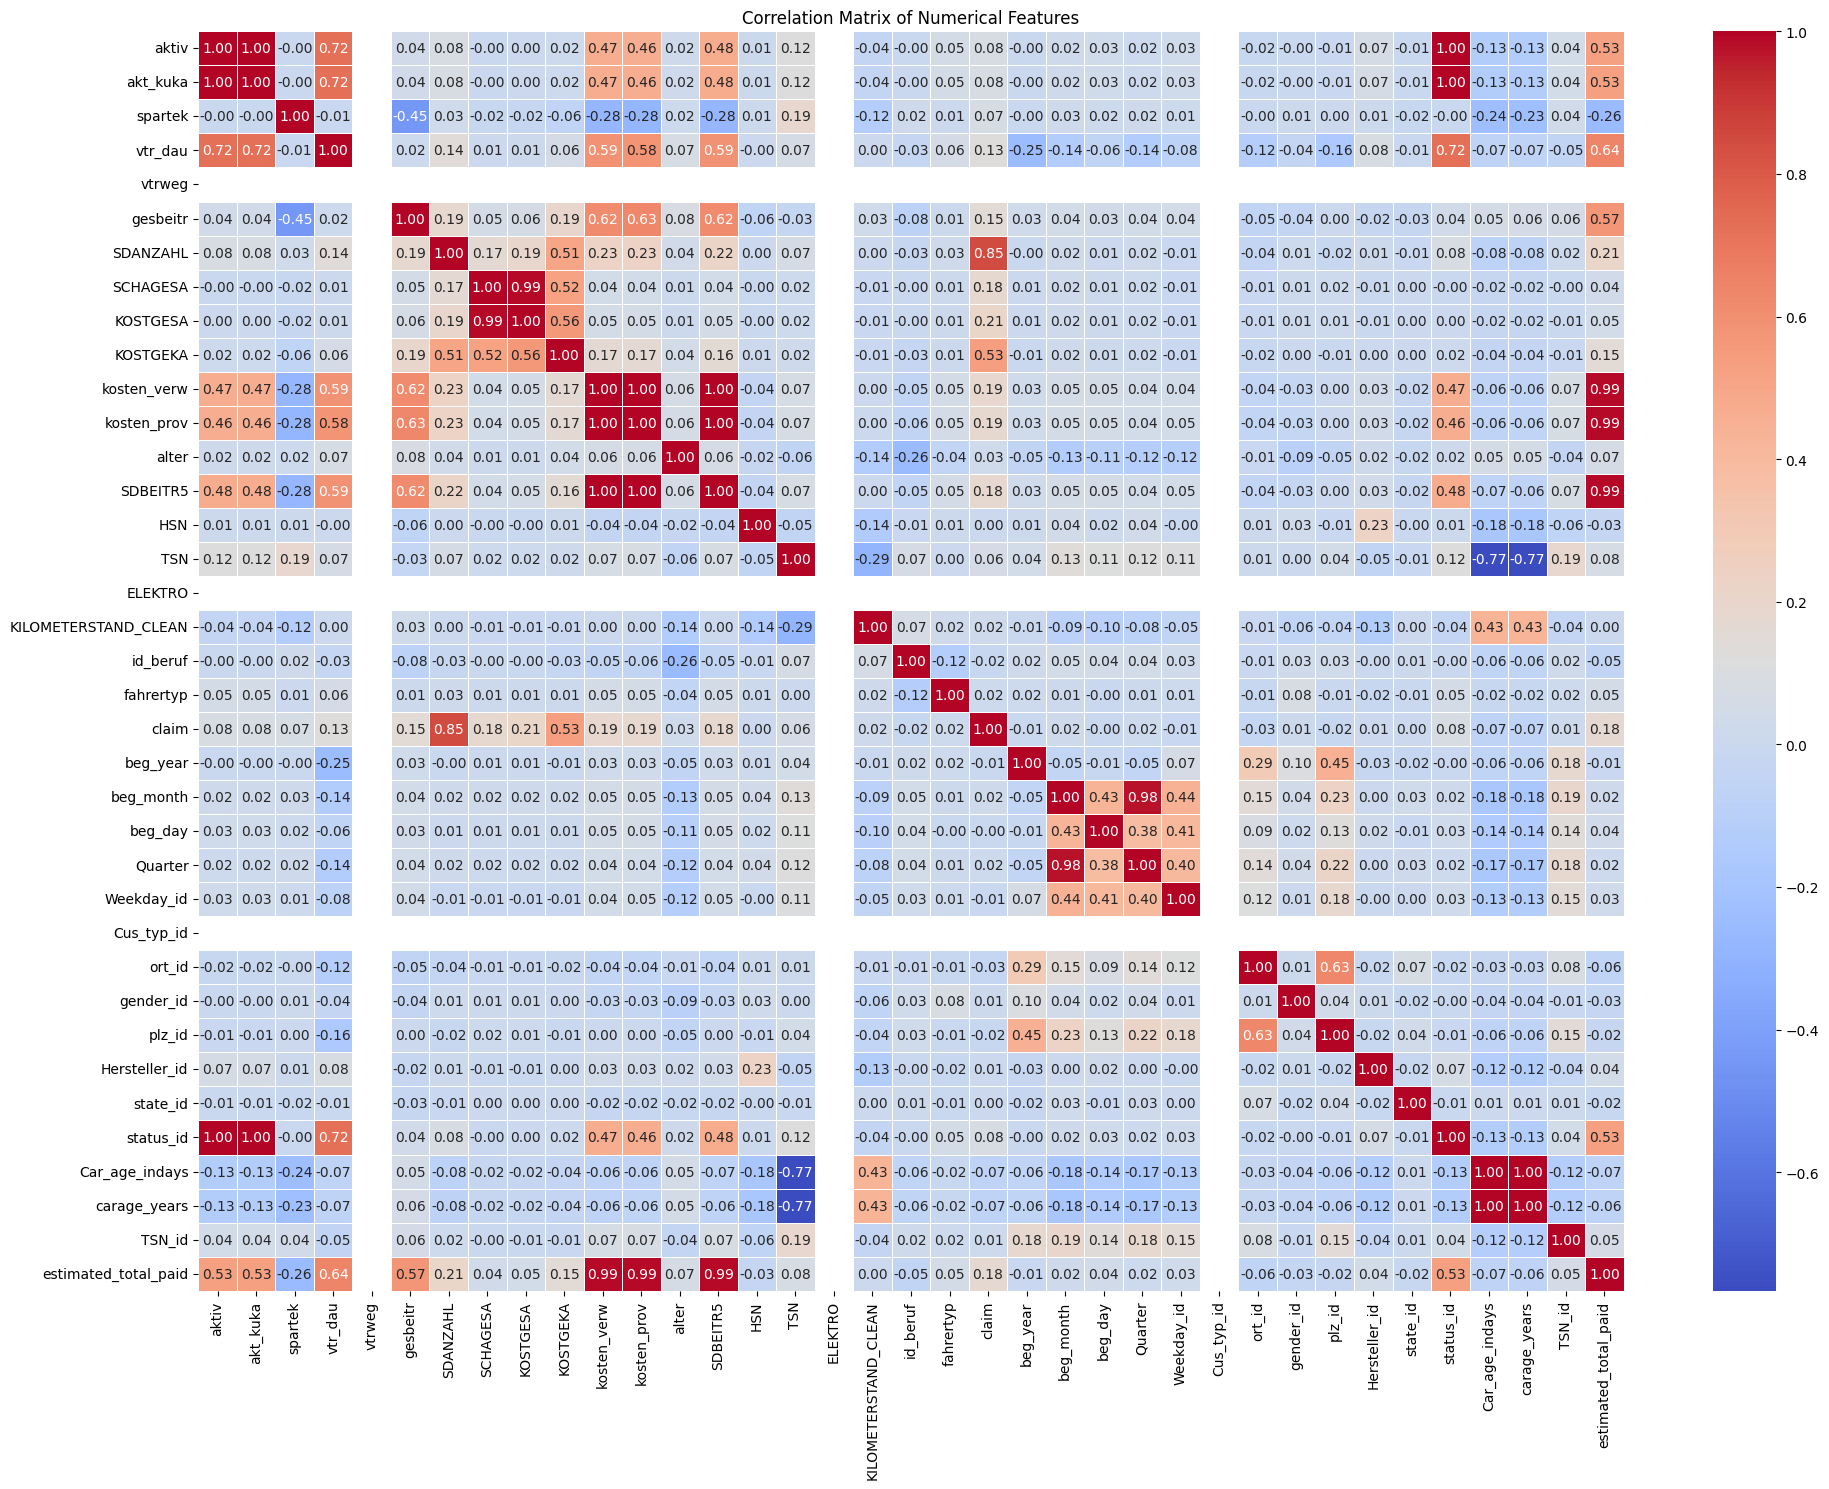

In [25]:
# Visualizing the correlation matrix of numerical features in the dataset
# This will help in understanding the relationships between different numerical features.
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# 2. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 3. Display as heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [26]:
# Assuming 'SDANZAHL' is your target variable for claims prediction
X = df.select_dtypes(include=['number']).drop(['claim'], axis=1)
y = df['claim']

# Print shapes to verify
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (181969, 36)
Target shape: (181969,)


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [28]:
# Deep Learning Solution for Claim Prediction - Manual Feature Selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class ClaimPredictionModel:
    def __init__(self, manual_features=None):
        self.scaler = StandardScaler()
        self.model = None
        self.feature_names = manual_features
        self.target_name = 'claim'
        
    def load_and_explore_data(self, df):
        """Load and explore the dataset"""
        print("Dataset Shape:", df.shape)
        print("\nTarget Variable Distribution:")
        print(df[self.target_name].value_counts())
        print(f"\nTarget Balance: {df[self.target_name].value_counts(normalize=True)}")
        
        return df
    
    def validate_features(self, df):
        """Validate that all manual features exist in the dataset"""
        if self.feature_names is None:
            raise ValueError("No features specified. Please provide manual_features when initializing the model.")
        
        missing_features = [f for f in self.feature_names if f not in df.columns]
        if missing_features:
            print(f"WARNING: These features are missing from the dataset: {missing_features}")
            # Remove missing features
            self.feature_names = [f for f in self.feature_names if f in df.columns]
            print(f"Using available features: {self.feature_names}")
        
        if len(self.feature_names) == 0:
            raise ValueError("No valid features found in the dataset.")
        
        print(f"\nUsing {len(self.feature_names)} manually selected features:")
        for i, feature in enumerate(self.feature_names, 1):
            print(f"  {i}. {feature}")
        
        return self.feature_names
    
    def analyze_selected_features(self, df):
        """Analyze the manually selected features"""
        print("\n" + "="*50)
        print("FEATURE ANALYSIS")
        print("="*50)
        
        # Basic statistics
        print("\nFeature Statistics:")
        print(df[self.feature_names].describe())
        
        # Missing values
        missing_values = df[self.feature_names].isnull().sum()
        if missing_values.sum() > 0:
            print("\nMissing Values:")
            for feature, missing in missing_values.items():
                if missing > 0:
                    print(f"  {feature}: {missing} ({missing/len(df)*100:.1f}%)")
        else:
            print("\nNo missing values found in selected features.")
        
        # Correlation with target
        print("\nCorrelation with Target Variable:")
        correlations = df[self.feature_names + [self.target_name]].corr()[self.target_name].drop(self.target_name)
        correlations_sorted = correlations.abs().sort_values(ascending=False)
        
        for feature in correlations_sorted.index:
            corr_val = correlations[feature]
            print(f"  {feature}: {corr_val:.4f}")
        
        return correlations_sorted
    
    def preprocess_data(self, df):
        """Preprocess the data for training"""
        # Validate features first
        selected_features = self.validate_features(df)
        
        # Prepare features and target
        X = df[selected_features].copy()
        y = df[self.target_name].copy()
        
        # Handle missing values
        print(f"\nHandling missing values...")
        X = X.fillna(X.median())
        print("Missing values filled with median.")
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"\nData split:")
        print(f"  Training set: {X_train.shape[0]} samples")
        print(f"  Test set: {X_test.shape[0]} samples")
        
        # Scale the features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, y_train, y_test, X_train, X_test
    
    def build_deep_learning_model(self, input_dim, hidden_layers=[128, 64, 32], dropout_rate=0.3):
        """Build a deep neural network model"""
        model = keras.Sequential()
        
        # Input layer
        model.add(layers.Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
        
        # Hidden layers
        for units in hidden_layers[1:]:
            model.add(layers.Dense(units, activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Dropout(dropout_rate))
        
        # Output layer (binary classification)
        model.add(layers.Dense(1, activation='sigmoid'))
        
        # Compile model
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'precision', 'recall']
        )
        
        return model
    
    def train_model(self, X_train, X_test, y_train, y_test, epochs=100, batch_size=32):
        """Train the deep learning model"""
        # Build model
        self.model = self.build_deep_learning_model(X_train.shape[1])
        
        print(f"\nModel Architecture:")
        print(f"  Input features: {X_train.shape[1]}")
        self.model.summary()
        
        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=10, restore_best_weights=True
        )
        
        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
        )
        
        # Train model
        print("Training Deep Learning Model...")
        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        
        return history
    
    def evaluate_model(self, X_test, y_test):
        """Evaluate the trained model"""
        # Predictions
        y_pred_proba = self.model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int).flatten()
        
        # Metrics
        print("\n" + "="*50)
        print("MODEL EVALUATION RESULTS")
        print("="*50)
        
        print(f"Test Accuracy: {np.mean(y_pred == y_test):.4f}")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
        
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        return y_pred, y_pred_proba
    
    def plot_training_history(self, history):
        """Plot training history"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Accuracy
        axes[0, 0].plot(history.history['accuracy'], label='Training')
        axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
        axes[0, 0].set_title('Model Accuracy')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].legend()
        
        # Loss
        axes[0, 1].plot(history.history['loss'], label='Training')
        axes[0, 1].plot(history.history['val_loss'], label='Validation')
        axes[0, 1].set_title('Model Loss')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Loss')
        axes[0, 1].legend()
        
        # Precision
        axes[1, 0].plot(history.history['precision'], label='Training')
        axes[1, 0].plot(history.history['val_precision'], label='Validation')
        axes[1, 0].set_title('Model Precision')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].legend()
        
        # Recall
        axes[1, 1].plot(history.history['recall'], label='Training')
        axes[1, 1].plot(history.history['val_recall'], label='Validation')
        axes[1, 1].set_title('Model Recall')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].legend()
        
        plt.tight_layout()
        plt.show()
    
    def plot_confusion_matrix_and_roc(self, y_test, y_pred, y_pred_proba):
        """Plot confusion matrix and ROC curve"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title('Confusion Matrix')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('Actual')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
        axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('ROC Curve')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
    
    def feature_importance_analysis(self, X_train, y_train):
        """Analyze feature importance using Random Forest"""
        print("\n" + "="*50)
        print("FEATURE IMPORTANCE ANALYSIS")
        print("="*50)
        
        # Train Random Forest for feature importance
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        
        # Get feature importance
        importance_df = pd.DataFrame({
            'feature': self.feature_names,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("Feature Importance Ranking:")
        for i, (_, row) in enumerate(importance_df.iterrows(), 1):
            print(f"  {i}. {row['feature']}: {row['importance']:.4f}")
        
        # Plot feature importance
        plt.figure(figsize=(10, 8))
        sns.barplot(data=importance_df, x='importance', y='feature')
        plt.title('Feature Importance (Random Forest)')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
        
        return importance_df
    
    def predict_new_data(self, new_data):
        """Make predictions on new data"""
        # Ensure new_data has the same features
        try:
            new_data_selected = new_data[self.feature_names]
        except KeyError as e:
            missing_cols = [col for col in self.feature_names if col not in new_data.columns]
            raise KeyError(f"Missing columns in new data: {missing_cols}")
        
        new_data_scaled = self.scaler.transform(new_data_selected.fillna(new_data_selected.median()))
        
        # Predict
        predictions_proba = self.model.predict(new_data_scaled)
        predictions = (predictions_proba > 0.5).astype(int).flatten()
        
        return predictions, predictions_proba
    
    def run_complete_pipeline(self, df):
        """Run the complete machine learning pipeline"""
        print("Starting Deep Learning Pipeline for Claim Prediction")
        print("="*60)
        
        # 1. Data exploration
        df = self.load_and_explore_data(df)
        
        # 2. Analyze selected features
        correlations = self.analyze_selected_features(df)
        
        # 3. Data preprocessing
        X_train, X_test, y_train, y_test, X_train_orig, X_test_orig = self.preprocess_data(df)
        
        # 4. Feature importance analysis
        importance_df = self.feature_importance_analysis(X_train_orig, y_train)
        
        # 5. Train model
        history = self.train_model(X_train, X_test, y_train, y_test)
        
        # 6. Evaluate model
        y_pred, y_pred_proba = self.evaluate_model(X_test, y_test)
        
        # 7. Visualizations
        self.plot_training_history(history)
        self.plot_confusion_matrix_and_roc(y_test, y_pred, y_pred_proba)
        
        return {
            'model': self.model,
            'scaler': self.scaler,
            'selected_features': self.feature_names,
            'correlations': correlations,
            'importance_df': importance_df,
            'history': history,
            'test_accuracy': np.mean(y_pred == y_test),
            'test_auc': roc_auc_score(y_test, y_pred_proba)
        }

# Usage with your manual features:
"""
# Define your manual features
manual_features = [
    'vtr_dau', 'gesbeitr', 'KOSTGESA', 'KOSTGEKA', 
    'kosten_verw', 'kosten_prov', 'spartek', 'status_id', 
    'Car_age_indays', 'estimated_total_paid'
]

# Load your data
df = pd.read_csv('your_data.csv')  # Replace with your data file

# Initialize with manual features
claim_predictor = ClaimPredictionModel(manual_features=manual_features)

# Run the pipeline
results = claim_predictor.run_complete_pipeline(df)

# Make predictions on new data
# new_predictions, new_probabilities = claim_predictor.predict_new_data(new_df)
"""

"\n# Define your manual features\nmanual_features = [\n    'vtr_dau', 'gesbeitr', 'KOSTGESA', 'KOSTGEKA', \n    'kosten_verw', 'kosten_prov', 'spartek', 'status_id', \n    'Car_age_indays', 'estimated_total_paid'\n]\n\n# Load your data\ndf = pd.read_csv('your_data.csv')  # Replace with your data file\n\n# Initialize with manual features\nclaim_predictor = ClaimPredictionModel(manual_features=manual_features)\n\n# Run the pipeline\nresults = claim_predictor.run_complete_pipeline(df)\n\n# Make predictions on new data\n# new_predictions, new_probabilities = claim_predictor.predict_new_data(new_df)\n"

Starting Deep Learning Pipeline for Claim Prediction
Dataset Shape: (181969, 54)

Dataset Columns: ['vsnr', 'status', 'aktiv', 'akt_kuka', 'spartek', 'beginn', 'vtr_dau', 'kund_beg', 'vtrweg', 'gesbeitr', 'SDANZAHL', 'SCHAGESA', 'KOSTGESA', 'KOSTGEKA', 'kosten_verw', 'kosten_prov', 'gfeld', 'ort', 'plz', 'alter', 'anr', 'SDBEITR5', 'HERSTELLER', 'HSN', 'TSN', 'ELEKTRO', 'KILOMETERSTAND_CLEAN', 'ZW', 'id_beruf', 'fahrertyp', 'claim', 'ersz_final', 'beg_year', 'beg_month', 'beg_day', 'weekday', 'Quarter', 'Weekday_id', 'Cus_type', 'Cus_typ_id', 'ort_id', 'Sex_id', 'Sex', 'gender_id', 'plz_id', 'Hersteller_id', 'state', 'state_id', 'status_id', 'First_reg', 'Car_age_indays', 'carage_years', 'TSN_id', 'estimated_total_paid']

Target Variable 'claim' Distribution:
claim
0    164267
1     17702
Name: count, dtype: int64

Target Balance: claim
0    0.90272
1    0.09728
Name: proportion, dtype: float64

FEATURE ANALYSIS

Feature Statistics:
             vtr_dau       gesbeitr    kosten_verw   

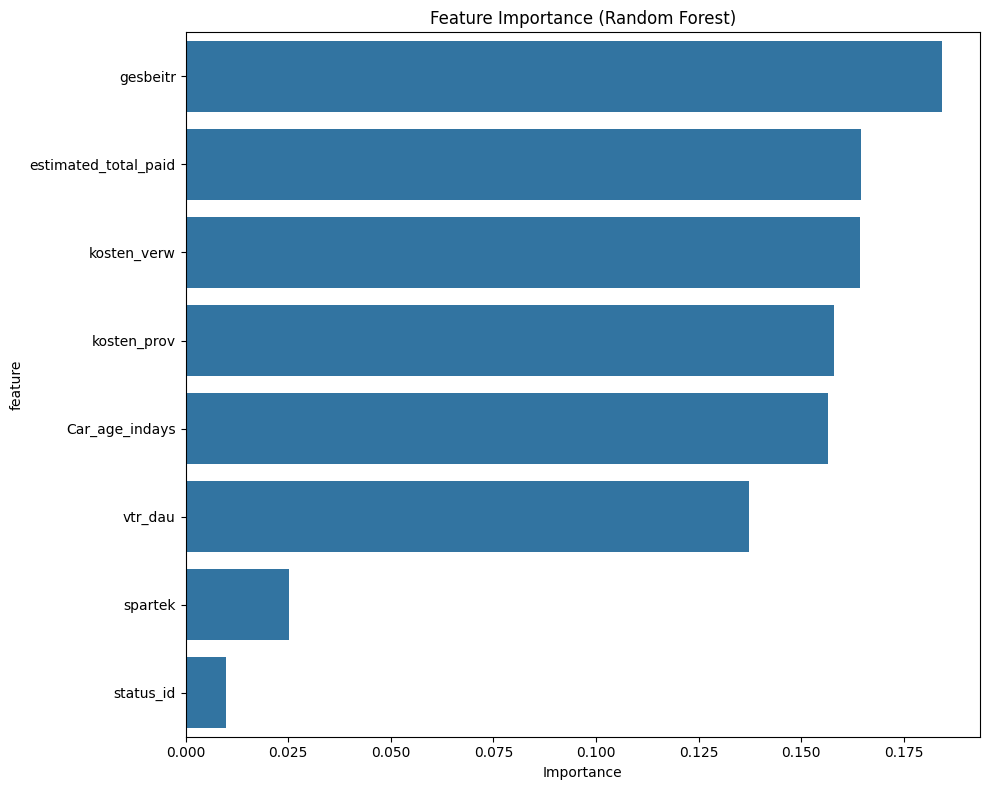


Model Architecture:
  Input features: 8


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 11,969 (46.75 KB)

 Non-trainable params: 448 (1.75 KB)

Training Deep Learning Model...
Epoch 1/100
4550/4550 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8905 - loss: 0.3171 - precision: 0.2207 - recall: 0.0496 - val_accuracy: 0.9036 - val_loss: 0.2776 - val_precision: 0.5727 - val_recall: 0.0356 - learning_rate: 0.0010
Epoch 2/100
4550/4550 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9033 - loss: 0.2854 - precision: 0.5537 - recall: 0.0299 - val_accuracy: 0.9034 - val_loss: 0.2747 - val_precision: 0.5401 - val_recall: 0.0494 - learning_rate: 0.0010
Epoch 3/100
4550/4550 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9036 - loss: 0.2828 - precision: 0.5798 - recall: 0.0336 - val_accuracy: 0.9026 - val_loss: 0.2738 - val_precision: 0.4953 - val_recall: 0.0599 - learning_rate: 0.0010
Epoch 4/100
4550/4550 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9042 - loss: 0.2805 - precision: 0.6073 - recall: 0.0424 - val_accuracy: 0.9045 - val_loss: 0.2714 - val_precision: 0.5941 - val_recall: 0.0571 - learning_rate: 0.0010
Epoch 5/100
4550

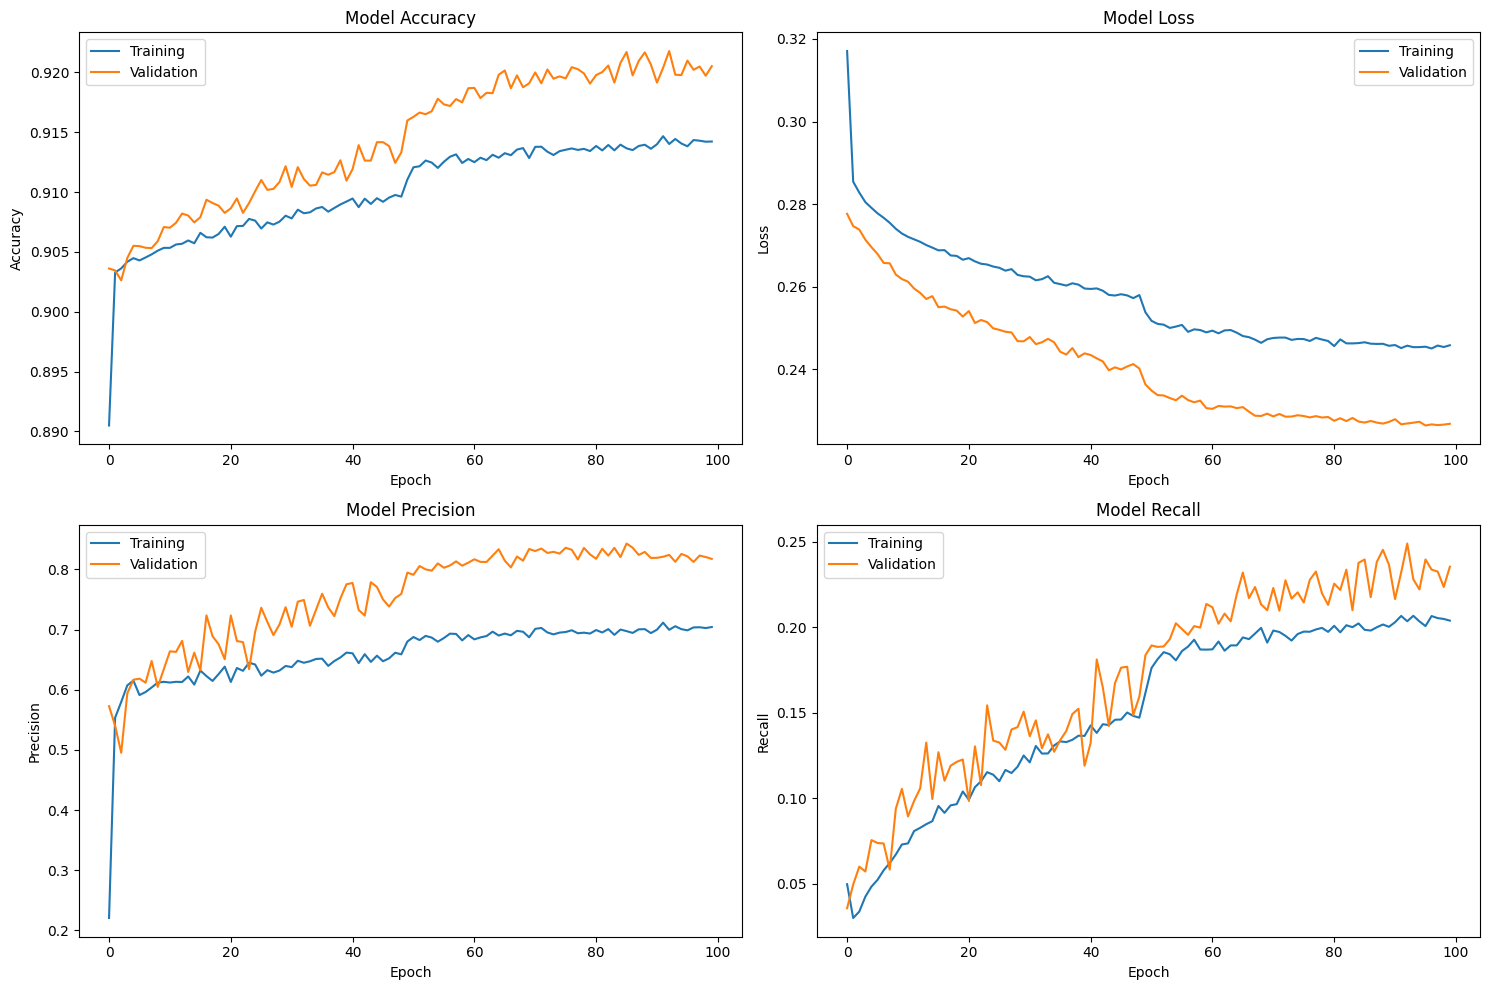

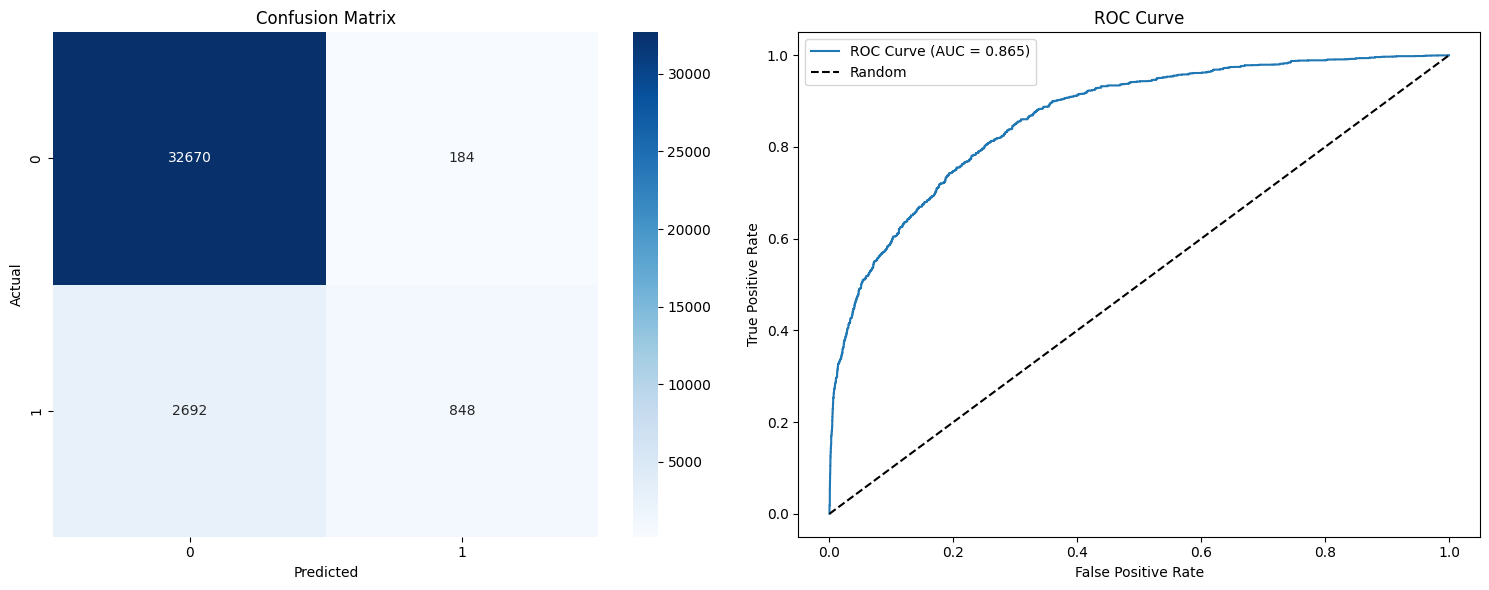


FINAL RESULTS SUMMARY
✅ Test Accuracy: 0.9210 (92.10%)
✅ ROC AUC Score: 0.8645
✅ Features Used: 8
✅ Model: Deep Neural Network

🎯 SELECTED FEATURES:
   1. vtr_dau
   2. gesbeitr
   3. kosten_verw
   4. kosten_prov
   5. spartek
   6. status_id
   7. Car_age_indays
   8. estimated_total_paid

📊 TOP 5 MOST IMPORTANT FEATURES:
   1. gesbeitr: 0.1844
   2. estimated_total_paid: 0.1646
   3. kosten_verw: 0.1642
   4. kosten_prov: 0.1579
   5. Car_age_indays: 0.1566

💾 SAVING MODEL...


✅ Model saved as 'claim_prediction_model.h5'
✅ Scaler saved as 'claim_scaler.pkl'
✅ Features saved as 'selected_features.pkl'


In [39]:
# Deep Learning Solution for Claim Prediction - Manual Feature Selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class ClaimPredictionModel:
    def __init__(self, manual_features=None, target_column='claim'):
        self.scaler = StandardScaler()
        self.model = None
        self.feature_names = manual_features
        self.target_name = target_column
        
    def load_and_explore_data(self, df):
        """Load and explore the dataset"""
        print("Dataset Shape:", df.shape)
        print(f"\nDataset Columns: {list(df.columns)}")
        
        # Check if target column exists
        if self.target_name not in df.columns:
            print(f"\nERROR: Target column '{self.target_name}' not found in dataset!")
            print("Available columns:", list(df.columns))
            raise KeyError(f"Target column '{self.target_name}' not found. Please specify the correct target column name.")
        
        print(f"\nTarget Variable '{self.target_name}' Distribution:")
        print(df[self.target_name].value_counts())
        print(f"\nTarget Balance: {df[self.target_name].value_counts(normalize=True)}")
        
        return df
    
    def validate_features(self, df):
        """Validate that all manual features exist in the dataset"""
        if self.feature_names is None:
            raise ValueError("No features specified. Please provide manual_features when initializing the model.")
        
        missing_features = [f for f in self.feature_names if f not in df.columns]
        if missing_features:
            print(f"WARNING: These features are missing from the dataset: {missing_features}")
            # Remove missing features
            self.feature_names = [f for f in self.feature_names if f in df.columns]
            print(f"Using available features: {self.feature_names}")
        
        if len(self.feature_names) == 0:
            raise ValueError("No valid features found in the dataset.")
        
        print(f"\nUsing {len(self.feature_names)} manually selected features:")
        for i, feature in enumerate(self.feature_names, 1):
            print(f"  {i}. {feature}")
        
        return self.feature_names
    
    def analyze_selected_features(self, df):
        """Analyze the manually selected features"""
        print("\n" + "="*50)
        print("FEATURE ANALYSIS")
        print("="*50)
        
        # Basic statistics
        print("\nFeature Statistics:")
        print(df[self.feature_names].describe())
        
        # Missing values
        missing_values = df[self.feature_names].isnull().sum()
        if missing_values.sum() > 0:
            print("\nMissing Values:")
            for feature, missing in missing_values.items():
                if missing > 0:
                    print(f"  {feature}: {missing} ({missing/len(df)*100:.1f}%)")
        else:
            print("\nNo missing values found in selected features.")
        
        # Correlation with target
        print("\nCorrelation with Target Variable:")
        correlations = df[self.feature_names + [self.target_name]].corr()[self.target_name].drop(self.target_name)
        correlations_sorted = correlations.abs().sort_values(ascending=False)
        
        for feature in correlations_sorted.index:
            corr_val = correlations[feature]
            print(f"  {feature}: {corr_val:.4f}")
        
        return correlations_sorted
    
    def preprocess_data(self, df):
        """Preprocess the data for training"""
        # Validate features first
        selected_features = self.validate_features(df)
        
        # Prepare features and target
        X = df[selected_features].copy()
        y = df[self.target_name].copy()
        
        # Handle missing values
        print(f"\nHandling missing values...")
        X = X.fillna(X.median())
        print("Missing values filled with median.")
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"\nData split:")
        print(f"  Training set: {X_train.shape[0]} samples")
        print(f"  Test set: {X_test.shape[0]} samples")
        
        # Scale the features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, y_train, y_test, X_train, X_test
    
    def build_deep_learning_model(self, input_dim, hidden_layers=[128, 64, 32], dropout_rate=0.3):
        """Build a deep neural network model"""
        model = keras.Sequential()
        
        # Input layer
        model.add(layers.Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
        
        # Hidden layers
        for units in hidden_layers[1:]:
            model.add(layers.Dense(units, activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Dropout(dropout_rate))
        
        # Output layer (binary classification)
        model.add(layers.Dense(1, activation='sigmoid'))
        
        # Compile model
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'precision', 'recall']
        )
        
        return model
    
    def train_model(self, X_train, X_test, y_train, y_test, epochs=100, batch_size=32):
        """Train the deep learning model"""
        # Build model
        self.model = self.build_deep_learning_model(X_train.shape[1])
        
        print(f"\nModel Architecture:")
        print(f"  Input features: {X_train.shape[1]}")
        self.model.summary()
        
        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=10, restore_best_weights=True
        )
        
        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
        )
        
        # Train model
        print("Training Deep Learning Model...")
        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        
        return history
    
    def evaluate_model(self, X_test, y_test):
        """Evaluate the trained model"""
        # Predictions
        y_pred_proba = self.model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int).flatten()
        
        # Metrics
        print("\n" + "="*50)
        print("MODEL EVALUATION RESULTS")
        print("="*50)
        
        print(f"Test Accuracy: {np.mean(y_pred == y_test):.4f}")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
        
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        return y_pred, y_pred_proba
    
    def plot_training_history(self, history):
        """Plot training history"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Accuracy
        axes[0, 0].plot(history.history['accuracy'], label='Training')
        axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
        axes[0, 0].set_title('Model Accuracy')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].legend()
        
        # Loss
        axes[0, 1].plot(history.history['loss'], label='Training')
        axes[0, 1].plot(history.history['val_loss'], label='Validation')
        axes[0, 1].set_title('Model Loss')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Loss')
        axes[0, 1].legend()
        
        # Precision
        axes[1, 0].plot(history.history['precision'], label='Training')
        axes[1, 0].plot(history.history['val_precision'], label='Validation')
        axes[1, 0].set_title('Model Precision')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].legend()
        
        # Recall
        axes[1, 1].plot(history.history['recall'], label='Training')
        axes[1, 1].plot(history.history['val_recall'], label='Validation')
        axes[1, 1].set_title('Model Recall')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].legend()
        
        plt.tight_layout()
        plt.show()
    
    def plot_confusion_matrix_and_roc(self, y_test, y_pred, y_pred_proba):
        """Plot confusion matrix and ROC curve"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title('Confusion Matrix')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('Actual')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
        axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('ROC Curve')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
    
    def feature_importance_analysis(self, X_train, y_train):
        """Analyze feature importance using Random Forest"""
        print("\n" + "="*50)
        print("FEATURE IMPORTANCE ANALYSIS")
        print("="*50)
        
        # Train Random Forest for feature importance
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        
        # Get feature importance
        importance_df = pd.DataFrame({
            'feature': self.feature_names,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("Feature Importance Ranking:")
        for i, (_, row) in enumerate(importance_df.iterrows(), 1):
            print(f"  {i}. {row['feature']}: {row['importance']:.4f}")
        
        # Plot feature importance
        plt.figure(figsize=(10, 8))
        sns.barplot(data=importance_df, x='importance', y='feature')
        plt.title('Feature Importance (Random Forest)')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
        
        return importance_df
    
    def predict_new_data(self, new_data):
        """Make predictions on new data"""
        # Ensure new_data has the same features
        try:
            new_data_selected = new_data[self.feature_names]
        except KeyError as e:
            missing_cols = [col for col in self.feature_names if col not in new_data.columns]
            raise KeyError(f"Missing columns in new data: {missing_cols}")
        
        new_data_scaled = self.scaler.transform(new_data_selected.fillna(new_data_selected.median()))
        
        # Predict
        predictions_proba = self.model.predict(new_data_scaled)
        predictions = (predictions_proba > 0.5).astype(int).flatten()
        
        return predictions, predictions_proba
    
    def run_complete_pipeline(self, df):
        """Run the complete machine learning pipeline"""
        print("Starting Deep Learning Pipeline for Claim Prediction")
        print("="*60)
        
        # 1. Data exploration
        df = self.load_and_explore_data(df)
        
        # 2. Analyze selected features
        correlations = self.analyze_selected_features(df)
        
        # 3. Data preprocessing
        X_train, X_test, y_train, y_test, X_train_orig, X_test_orig = self.preprocess_data(df)
        
        # 4. Feature importance analysis
        importance_df = self.feature_importance_analysis(X_train_orig, y_train)
        
        # 5. Train model
        history = self.train_model(X_train, X_test, y_train, y_test)
        
        # 6. Evaluate model
        y_pred, y_pred_proba = self.evaluate_model(X_test, y_test)
        
        # 7. Visualizations
        self.plot_training_history(history)
        self.plot_confusion_matrix_and_roc(y_test, y_pred, y_pred_proba)
        
        return {
            'model': self.model,
            'scaler': self.scaler,
            'selected_features': self.feature_names,
            'correlations': correlations,
            'importance_df': importance_df,
            'history': history,
            'test_accuracy': np.mean(y_pred == y_test),
            'test_auc': roc_auc_score(y_test, y_pred_proba)
        }

# Helper function to explore your dataset
def explore_dataset(df):
    """Explore the dataset to understand its structure"""
    print("DATASET EXPLORATION")
    print("="*50)
    print(f"Shape: {df.shape}")
    print(f"\nColumn names:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i}. {col}")
    
    print(f"\nData types:")
    print(df.dtypes)
    
    print(f"\nFirst few rows:")
    print(df.head())
    
    # Look for potential target columns
    potential_targets = []
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            unique_vals = df[col].nunique()
            if unique_vals == 2:  # Binary column
                potential_targets.append(col)
    
    if potential_targets:
        print(f"\nPotential binary target columns (might be your claim indicator):")
        for col in potential_targets:
            print(f"  - {col}: {df[col].value_counts().to_dict()}")
    
    return df

# Usage with your manual features:

# Then define your features and target
manual_features = [
    'vtr_dau', 'gesbeitr', 
    'kosten_verw', 'kosten_prov', 'spartek', 'status_id', 
    'Car_age_indays', 'estimated_total_paid'
]

# Initialize with manual features and correct target column name
claim_predictor = ClaimPredictionModel(
    manual_features=manual_features, 
    target_column='claim'  
)

# Run the pipeline
results = claim_predictor.run_complete_pipeline(df)

# DISPLAY THE RESULTS CLEARLY
print("\n" + "="*70)
print("FINAL RESULTS SUMMARY")
print("="*70)
print(f"✅ Test Accuracy: {results['test_accuracy']:.4f} ({results['test_accuracy']*100:.2f}%)")
print(f"✅ ROC AUC Score: {results['test_auc']:.4f}")
print(f"✅ Features Used: {len(results['selected_features'])}")
print(f"✅ Model: Deep Neural Network")

print(f"\n🎯 SELECTED FEATURES:")
for i, feature in enumerate(results['selected_features'], 1):
    print(f"   {i}. {feature}")

print(f"\n📊 TOP 5 MOST IMPORTANT FEATURES:")
for i, (_, row) in enumerate(results['importance_df'].head(5).iterrows(), 1):
    print(f"   {i}. {row['feature']}: {row['importance']:.4f}")

# SAVE THE MODEL
print(f"\n💾 SAVING MODEL...")
results['model'].save('claim_prediction_model.h5')
import joblib
joblib.dump(results['scaler'], 'claim_scaler.pkl')
joblib.dump(results['selected_features'], 'selected_features.pkl')
print("✅ Model saved as 'claim_prediction_model.h5'")
print("✅ Scaler saved as 'claim_scaler.pkl'")
print("✅ Features saved as 'selected_features.pkl'")


# Function to make predictions on new data
def make_predictions_on_new_data(claim_predictor, new_data):
    """Make predictions on new data and display results clearly"""
    print("\n" + "="*50)
    print("MAKING PREDICTIONS ON NEW DATA")
    print("="*50)
    
    try:
        predictions, probabilities = claim_predictor.predict_new_data(new_data)
        
        # Create results DataFrame
        results_df = pd.DataFrame({
            'Prediction': predictions,
            'Probability': probabilities.flatten(),
            'Risk_Level': ['High Risk' if p > 0.7 else 'Medium Risk' if p > 0.3 else 'Low Risk' 
                          for p in probabilities.flatten()]
        })
        
        print(f"📈 PREDICTION RESULTS:")
        print(f"   Total records predicted: {len(predictions)}")
        print(f"   Predicted Claims: {sum(predictions)} ({sum(predictions)/len(predictions)*100:.1f}%)")
        print(f"   Predicted No Claims: {len(predictions)-sum(predictions)} ({(len(predictions)-sum(predictions))/len(predictions)*100:.1f}%)")
        
        print(f"\n📊 RISK DISTRIBUTION:")
        risk_counts = results_df['Risk_Level'].value_counts()
        for risk, count in risk_counts.items():
            print(f"   {risk}: {count} ({count/len(results_df)*100:.1f}%)")
        
        print(f"\n📋 DETAILED RESULTS:")
        print(results_df.head(10))  # Show first 10 results
        
        return results_df
        
    except Exception as e:
        print(f"❌ Error making predictions: {e}")
        return None

# Function to load saved model and make predictions
def load_model_and_predict(new_data_file):
    """Load the saved model and make predictions on new data"""
    print("📂 LOADING SAVED MODEL...")
    
    try:
        # Load model components
        from tensorflow.keras.models import load_model
        import joblib
        
        model = load_model('claim_prediction_model.h5')
        scaler = joblib.load('claim_scaler.pkl')
        feature_names = joblib.load('selected_features.pkl')
        
        print("✅ Model loaded successfully!")
        
        # Load new data
        new_data = pd.read_csv(new_data_file)
        print(f"✅ New data loaded: {new_data.shape}")
        
        # Make predictions
        new_data_selected = new_data[feature_names]
        new_data_scaled = scaler.transform(new_data_selected.fillna(new_data_selected.median()))
        
        predictions_proba = model.predict(new_data_scaled)
        predictions = (predictions_proba > 0.5).astype(int).flatten()
        
        # Display results
        results_df = pd.DataFrame({
            'Prediction': predictions,
            'Probability': predictions_proba.flatten(),
            'Risk_Level': ['High Risk' if p > 0.7 else 'Medium Risk' if p > 0.3 else 'Low Risk' 
                          for p in predictions_proba.flatten()]
        })
        
        print(f"\n🎯 PREDICTIONS COMPLETE!")
        print(f"   Predicted Claims: {sum(predictions)} ({sum(predictions)/len(predictions)*100:.1f}%)")
        print(results_df.head())
        
        return results_df
        
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return None

In [35]:
X_train_scaled, X_test_scaled, y_train, y_test, X_train_raw, X_test_raw = claim_predictor.preprocess_data(df)



Using 10 manually selected features:
  1. vtr_dau
  2. gesbeitr
  3. KOSTGESA
  4. KOSTGEKA
  5. kosten_verw
  6. kosten_prov
  7. spartek
  8. status_id
  9. Car_age_indays
  10. estimated_total_paid

Handling missing values...
Missing values filled with median.

Data split:
  Training set: 145575 samples
  Test set: 36394 samples


In [38]:
import shap

self.X_test_scaled = X_test_scaled
self.X_train_scaled = X_train_scaled

# Select a background sample for SHAP (e.g., 100 rows from training set)
X_background = claim_predictor.X_train_scaled[np.random.choice(claim_predictor.X_train_scaled.shape[0], 100, replace=False)]
X_sample = claim_predictor.X_test_scaled[:100]


# Create SHAP explainer
explainer = shap.DeepExplainer(claim_predictor.model, X_background)

# Choose a few test samples to explain
X_sample = X_test[:100]

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# Plot summary
shap.summary_plot(shap_values[0], X_sample, feature_names=claim_predictor.feature_names)


NameError: name 'self' is not defined